### Fix Data

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#importing the data 
df_actual = pd.read_csv('UTMSBA_ACTL.csv')
df_schd = pd.read_csv('UTMSBA_SCHD.csv')
df_fuel = pd.read_csv('UTMSBA_FUELPRICE.csv')
df1 = df_actual.copy()
df2 = df_schd.copy()
fuel = df_fuel.copy()

In [4]:
#Added cols
df1['pairs'] = df1['Orig'] + ' - ' + df1['Dest']

In [5]:
#Dates
def date_format(value):
    value = str(value)
    year = int(value[:4])
    month = int(value[5:7])
    day = int(value[8:])
    
    #print(year,month,day)
    date = datetime.date(year,month, day)
    return date 

df1['Dep_dt'] = df1['Dep_dt'].map(date_format)
df1['day_of_week'] = df1['Dep_dt'].apply(lambda x: dt.weekday(x))

#year_month
def year_month(value):
    value = str(value)
    return str(value[:7])

df1['year_month'] = df1['Dep_dt'].map(year_month)

In [6]:
#Arrival time
def hour_of_the_day(time):
    time = str(time)
    return int(time[:-2])

df1['hour_out'] = df1['ACTL_TM_OUT_CENT'].map(hour_of_the_day)
df1['hour_in'] = df1['ACTL_TM_IN_CENT'].map(hour_of_the_day)

In [7]:
#Pull out month
def pull_month(value):
    value = str(value)
    month = int(value[5:7])
    return month

df1['month'] = df1['Dep_dt'].map(pull_month)

In [8]:
#Pull out year
def pull_year(value):
    value = str(value)
    year = int(value[:4])
    return year

df1['year'] = df1['Dep_dt'].map(pull_year)

In [9]:
#Name day of week
import calendar
days = list(calendar.day_abbr)
def name_day(value): 
    return days[value]

df1['day'] = df1['day_of_week'].map(name_day)

In [10]:
#create weeks
df1['Dep_dt'][0].strftime('%W') #first week = 35th week of the year
df1['week_of_year'] = df1['Dep_dt'].apply(lambda x: x.strftime('%W'))

In [11]:
df1.head()

,Dep_dt,Orig,Dest,Tail,Stage_length,ACTL_TM_IN_CENT,ACTL_TM_OUT_CENT,ACFT,Actl_BM,Gross_gal,...,Tanker_gal,pairs,day_of_week,year_month,hour_out,hour_in,month,year,day,week_of_year
0,2017-09-01,FYX,ZEY,N09303,240,1005,844,73W,81,536.3,...,0.0,FYX - ZEY,4,2017-09,8,10,9,2017,Fri,35
1,2017-09-01,ZEY,KMU,N09303,274,1139,1043,73W,56,1145.6,...,0.0,ZEY - KMU,4,2017-09,10,11,9,2017,Fri,35
2,2017-09-01,KMU,DWF,N09303,1419,1520,1221,73W,179,1923.3,...,0.0,KMU - DWF,4,2017-09,12,15,9,2017,Fri,35
3,2017-09-01,DWF,ZEY,N09303,1213,1838,1556,73W,162,2115.7,...,0.0,DWF - ZEY,4,2017-09,15,18,9,2017,Fri,35
4,2017-09-01,ZEY,FSG,N09303,1051,2140,1925,73W,135,2703.5,...,1029.7,ZEY - FSG,4,2017-09,19,21,9,2017,Fri,35


In [12]:
df1.columns.values

array(['Dep_dt', 'Orig', 'Dest', 'Tail', 'Stage_length',
       'ACTL_TM_IN_CENT', 'ACTL_TM_OUT_CENT', 'ACFT', 'Actl_BM',
       'Gross_gal', 'Enroute_gal', 'Alt_gal', 'Cont_gal', 'Tanker_gal',
       'pairs', 'day_of_week', 'year_month', 'hour_out', 'hour_in',
       'month', 'year', 'day', 'week_of_year'], dtype=object)

In [13]:
df2.head()

,Dep_dt,Orig,Dest,Stage_length,ACFT,Schd_BM,OPNG_RTE_ID,OPNG_RTE_SEG_ID,TM_OUT_mins
0,2017-01-01,ZMB,AIJ,767,733,140,1,0,360
1,2017-01-01,AIJ,LSV,252,733,60,1,1,545
2,2017-01-01,LSV,PUS,482,733,95,1,2,640
3,2017-01-01,PUS,KHG,321,733,60,1,3,770
4,2017-01-01,KHG,PUS,321,733,75,1,4,865


In [14]:
fuel = fuel.rename(columns={'Hashed_Station': 'Orig', 'Date':'Dep_dt'})

In [15]:
fuel['Dep_dt'] = fuel['Dep_dt'].map(date_format)

In [16]:
fuel.head()

,Dep_dt,Orig,Hashed_Fuel_Price
0,2017-09-01,BUX,1.8858
1,2017-09-02,BUX,1.8858
2,2017-09-03,BUX,1.8858
3,2017-09-04,BUX,2.0948
4,2017-09-05,BUX,2.0948


In [17]:
#Drop time > 27 and airports with only one flight
df1_new = df1.drop(df1[df1['hour_out']>27].index,axis=0)

In [18]:
a = df1_new['Orig'].value_counts()==1
drps = list(a[a].index)

In [19]:
df1_f = df1_new.drop(df1_new[df1_new['Orig'].isin(drps)].index,axis=0)

In [20]:
# merge to get the fuel information
df1_f = pd.merge(df1_f, fuel, on = ['Orig', 'Dep_dt'], how= 'left')
#df1_f = df1_f.merge(clusters, how='left',on='Orig')

In [21]:
df1_f.head()

,Dep_dt,Orig,Dest,Tail,Stage_length,ACTL_TM_IN_CENT,ACTL_TM_OUT_CENT,ACFT,Actl_BM,Gross_gal,...,pairs,day_of_week,year_month,hour_out,hour_in,month,year,day,week_of_year,Hashed_Fuel_Price
0,2017-09-01,FYX,ZEY,N09303,240,1005,844,73W,81,536.3,...,FYX - ZEY,4,2017-09,8,10,9,2017,Fri,35,1.9624
1,2017-09-01,ZEY,KMU,N09303,274,1139,1043,73W,56,1145.6,...,ZEY - KMU,4,2017-09,10,11,9,2017,Fri,35,1.7326
2,2017-09-01,KMU,DWF,N09303,1419,1520,1221,73W,179,1923.3,...,KMU - DWF,4,2017-09,12,15,9,2017,Fri,35,1.9475
3,2017-09-01,DWF,ZEY,N09303,1213,1838,1556,73W,162,2115.7,...,DWF - ZEY,4,2017-09,15,18,9,2017,Fri,35,1.9375
4,2017-09-01,ZEY,FSG,N09303,1051,2140,1925,73W,135,2703.5,...,ZEY - FSG,4,2017-09,19,21,9,2017,Fri,35,1.7326


### Clustering - excludes fuel price information

In [17]:
#cluster using the data in df1_f
from sklearn.cluster import MiniBatchKMeans

In [18]:
#group airports and sum
for_clust_sum = df1_f.groupby(['Orig'])[[ 'Actl_BM', 'Gross_gal', 'Enroute_gal',
       'Alt_gal', 'Cont_gal', 'Tanker_gal']].sum() 

In [19]:
#group airports and calc mean values
for_clust_mean = df1_f.groupby(['Orig'])[[ 'Actl_BM', 'Gross_gal', 'Enroute_gal',
       'Alt_gal', 'Cont_gal', 'Tanker_gal']].mean()

In [20]:
#group airports and calc median
for_clust_med = df1_f.groupby(['Orig'])[[ 'Actl_BM', 'Gross_gal', 'Enroute_gal',
       'Alt_gal', 'Cont_gal', 'Tanker_gal']].median()

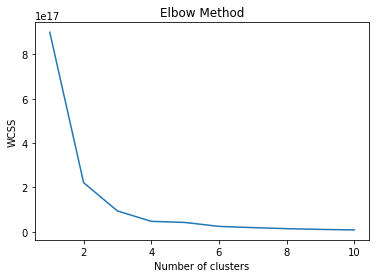

In [21]:
#Elbow plot to choose num of clusters for sum
wcss = []
for i in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=3, random_state=0)
    kmeans.fit(for_clust_sum)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

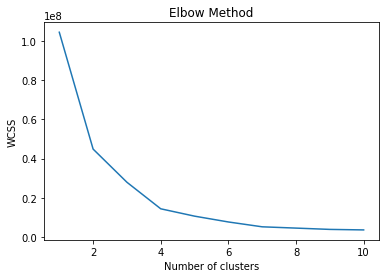

In [22]:
#Elbow plot to choose num of clusters for mean
wcss = []
for i in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=3, random_state=0)
    kmeans.fit(for_clust_mean)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

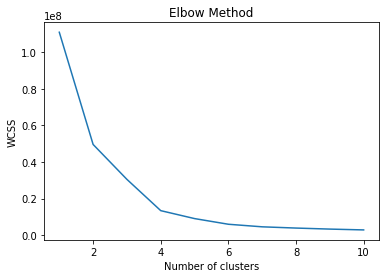

In [23]:
#Elbow plot to choose num of clusters for median
wcss = []
for i in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=3, random_state=0)
    kmeans.fit(for_clust_med)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#create clusters using mean
mean_clusters = MiniBatchKMeans(n_clusters=7, init_size=1024, batch_size=2048, random_state=20).fit_predict(for_clust_mean)
for_clust_mean['cluster'] = pd.Series(mean_clusters, index=for_clust_mean.index)

In [25]:
#create clusters using sum
sum_clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(for_clust_sum)
for_clust_sum['cluster'] = pd.Series(sum_clusters, index=for_clust_sum.index)

In [26]:
#for_clust_mean.head()

,Actl_BM,Gross_gal,Enroute_gal,Alt_gal,Cont_gal,Tanker_gal,cluster
Orig,,,,,,,
AIB,145.216200,1841.370053,1316.299216,172.086366,237.720610,115.263064,2
AIJ,113.387798,1609.180129,960.660872,163.734451,233.721683,251.062662,6
API,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5
AQL,101.148754,1018.794120,517.363476,183.866769,213.572566,103.991592,4
AUT,125.396993,1367.159426,928.520601,169.960983,222.344091,46.330995,6


In [27]:
#for_clust_sum.head()

,Actl_BM,Gross_gal,Enroute_gal,Alt_gal,Cont_gal,Tanker_gal,cluster
Orig,,,,,,,
AIB,14172375,179708510.3,128464222,16794768.9,23200342.9,11249098.7,3
AIJ,17310008,245660656.9,146656410,24996028.8,35680419.6,38327728.1,1
API,103,0.0,0,0.0,0.0,0.0,2
AQL,860169,8663825.2,4399659,1563603.0,1816221.1,884344.5,2
AUT,1892993,20638638.7,14016947,2565731.0,3356506.4,699412.7,2


In [28]:
for_clust_mean['cluster'].value_counts()

4    25
2    25
6    24
0    24
5    16
1    11
3     1
Name: cluster, dtype: int64

In [29]:
for_clust_sum['cluster'].value_counts()

2    87
0    22
3    10
1     7
Name: cluster, dtype: int64

Choose to continue with for_clust_mean with 7 clusters bc more evenly distributed

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances

In [33]:
#agglomerative cluster - euclidean
agg_clusters_e = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward').fit_predict(for_clust_mean)
for_clust_mean['cluster_euclid'] = pd.Series(agg_clusters_e, index=for_clust_mean.index)

In [35]:
#agglomerative cluster - cosine
agg_clusters_c = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='single').fit_predict(for_clust_mean)
for_clust_mean['cluster_cosine'] = pd.Series(agg_clusters_c, index=for_clust_mean.index)

In [36]:
#for_clust_mean.head()

,Actl_BM,Gross_gal,Enroute_gal,Alt_gal,Cont_gal,Tanker_gal,cluster,cluster_euclid,cluster_cosine
Orig,,,,,,,,,
AIB,145.216200,1841.370053,1316.299216,172.086366,237.720610,115.263064,2,0,0
AIJ,113.387798,1609.180129,960.660872,163.734451,233.721683,251.062662,6,0,0
API,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5,4,1
AQL,101.148754,1018.794120,517.363476,183.866769,213.572566,103.991592,4,3,0
AUT,125.396993,1367.159426,928.520601,169.960983,222.344091,46.330995,6,1,0


In [38]:
for_clust_mean['cluster_euclid'].value_counts()

1    34
0    31
3    19
4    16
6    15
2    10
5     1
Name: cluster_euclid, dtype: int64

In [39]:
for_clust_mean['cluster_cosine'].value_counts()

0    116
1      5
6      1
5      1
4      1
3      1
2      1
Name: cluster_cosine, dtype: int64

In [37]:
#to csv
for_clust_mean.to_csv("Mean Clusts_Agg.csv")

### LightGBM

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
#import xgboost as xgb
import lightgbm as lgb
from pandas import DataFrame

import warnings
warnings.filterwarnings("ignore")

#### Prep data

In [23]:
clusters = pd.read_csv("Mean Clusts_Agg.csv")

In [24]:
clusters = clusters.drop(['Actl_BM','Gross_gal','Enroute_gal','Alt_gal','Cont_gal','Tanker_gal'],axis = 1)

In [25]:
#creating columns to match Aifaz
df1_f['Dep_dt']= pd.to_datetime(df1_f['Dep_dt']) 
df1_f['year'] = df1_f['Dep_dt'].dt.year
df1_f['day_of_year'] = df1_f['Dep_dt'].dt.dayofyear
#df1['weekday'] = df1['Dep_dt'].dt.weekday
#df1['week_of_year'] = df1['Dep_dt'].dt.week
df1_f['day_of_month'] = df1_f['Dep_dt'].dt.day
df1_f['quarter'] = df1_f['Dep_dt'].dt.quarter
#df1.drop('activation_date', axis=1, inplace=True)

In [26]:
df1_f.columns

Index(['Dep_dt', 'Orig', 'Dest', 'Tail', 'Stage_length', 'ACTL_TM_IN_CENT',
       'ACTL_TM_OUT_CENT', 'ACFT', 'Actl_BM', 'Gross_gal', 'Enroute_gal',
       'Alt_gal', 'Cont_gal', 'Tanker_gal', 'pairs', 'day_of_week',
       'year_month', 'hour_out', 'hour_in', 'month', 'year', 'day',
       'week_of_year', 'Hashed_Fuel_Price', 'day_of_year', 'day_of_month',
       'quarter'],
      dtype='object')

In [27]:
df1_f = df1_f.drop('day',axis=1)

In [28]:
df1_f.head()

,Dep_dt,Orig,Dest,Tail,Stage_length,ACTL_TM_IN_CENT,ACTL_TM_OUT_CENT,ACFT,Actl_BM,Gross_gal,...,year_month,hour_out,hour_in,month,year,week_of_year,Hashed_Fuel_Price,day_of_year,day_of_month,quarter
0,2017-09-01,FYX,ZEY,N09303,240,1005,844,73W,81,536.3,...,2017-09,8,10,9,2017,35,1.9624,244,1,3
1,2017-09-01,ZEY,KMU,N09303,274,1139,1043,73W,56,1145.6,...,2017-09,10,11,9,2017,35,1.7326,244,1,3
2,2017-09-01,KMU,DWF,N09303,1419,1520,1221,73W,179,1923.3,...,2017-09,12,15,9,2017,35,1.9475,244,1,3
3,2017-09-01,DWF,ZEY,N09303,1213,1838,1556,73W,162,2115.7,...,2017-09,15,18,9,2017,35,1.9375,244,1,3
4,2017-09-01,ZEY,FSG,N09303,1051,2140,1925,73W,135,2703.5,...,2017-09,19,21,9,2017,35,1.7326,244,1,3


In [29]:
#merge with clusters file
df1_wc = df1_f.merge(clusters, how='left',on='Orig')

In [30]:
df1_wc.head()

,Dep_dt,Orig,Dest,Tail,Stage_length,ACTL_TM_IN_CENT,ACTL_TM_OUT_CENT,ACFT,Actl_BM,Gross_gal,...,month,year,week_of_year,Hashed_Fuel_Price,day_of_year,day_of_month,quarter,cluster,cluster_euclid,cluster_cosine
0,2017-09-01,FYX,ZEY,N09303,240,1005,844,73W,81,536.3,...,9,2017,35,1.9624,244,1,3,4,3,0
1,2017-09-01,ZEY,KMU,N09303,274,1139,1043,73W,56,1145.6,...,9,2017,35,1.7326,244,1,3,2,0,0
2,2017-09-01,KMU,DWF,N09303,1419,1520,1221,73W,179,1923.3,...,9,2017,35,1.9475,244,1,3,6,1,0
3,2017-09-01,DWF,ZEY,N09303,1213,1838,1556,73W,162,2115.7,...,9,2017,35,1.9375,244,1,3,6,1,0
4,2017-09-01,ZEY,FSG,N09303,1051,2140,1925,73W,135,2703.5,...,9,2017,35,1.7326,244,1,3,2,0,0


#### Run lightgbm

In [31]:
#keep only the cluster type that you want to use - here we will use kmeans cluster ouput 'cluster' 
#drop the euclid and cosine clusters
df1_gbm = df1_wc.drop(['cluster_euclid','cluster_cosine'], axis=1)
df1_gbm.columns

Index(['Dep_dt', 'Orig', 'Dest', 'Tail', 'Stage_length', 'ACTL_TM_IN_CENT',
       'ACTL_TM_OUT_CENT', 'ACFT', 'Actl_BM', 'Gross_gal', 'Enroute_gal',
       'Alt_gal', 'Cont_gal', 'Tanker_gal', 'pairs', 'day_of_week',
       'year_month', 'hour_out', 'hour_in', 'month', 'year', 'week_of_year',
       'Hashed_Fuel_Price', 'day_of_year', 'day_of_month', 'quarter',
       'cluster'],
      dtype='object')

In [32]:
cat_columns = df1_gbm.dtypes[df1_gbm.dtypes == 'object'].index
cat_columns

Index(['Orig', 'Dest', 'Tail', 'ACFT', 'pairs', 'year_month', 'week_of_year'], dtype='object')

In [33]:
#encode and fill any NAs
label_encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    df1_gbm[col].fillna("unknown")
    df1_gbm[col] = label_encoder.fit_transform(df1_gbm[col].astype(str))

In [45]:
#Model by cluster (0)
grp = df1_gbm[df1_gbm['cluster'] == 0]
grp = grp[grp.Gross_gal.between(grp.Gross_gal.quantile(.000), grp.Gross_gal.quantile(.95))] # without outliers

X = grp.drop(['Dep_dt','Gross_gal', 'Enroute_gal','Alt_gal', 'Cont_gal', 'Tanker_gal', 'pairs','ACTL_TM_IN_CENT',
       'ACTL_TM_OUT_CENT'], axis=1)
y = grp.Gross_gal
feature_names = X.columns.tolist()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42)
    
# LightGBM dataset formatting 
lgtrain = lgb.Dataset(X_train, y_train,
                feature_name=feature_names)
lgvalid = lgb.Dataset(X_valid, y_valid,
                feature_name=feature_names)

params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 40,
    'max_depth': 20,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.6,
    'verbosity' : -1,
    'num_iterations': 20000
}
lgb_clf = lgb.train(
    params,
    lgtrain,
    valid_sets=[lgtrain, lgvalid],
    valid_names=["train", "valid"],
    early_stopping_rounds=500,
    verbose_eval=500
)
print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, lgb_clf.predict(X_valid))))


Training until validation scores don't improve for 500 rounds
[500]	train's rmse: 460.86	valid's rmse: 464.649
[1000]	train's rmse: 448.247	valid's rmse: 455.817
[1500]	train's rmse: 440.281	valid's rmse: 451.342
[2000]	train's rmse: 433.887	valid's rmse: 448.234
[2500]	train's rmse: 427.86	valid's rmse: 445.347
[3000]	train's rmse: 422.752	valid's rmse: 443.285
[3500]	train's rmse: 418.197	valid's rmse: 441.668
[4000]	train's rmse: 413.76	valid's rmse: 440.119
[4500]	train's rmse: 409.538	valid's rmse: 438.556
[5000]	train's rmse: 405.483	valid's rmse: 437.226
[5500]	train's rmse: 401.754	valid's rmse: 436.261
[6000]	train's rmse: 398.216	valid's rmse: 435.319
[6500]	train's rmse: 394.784	valid's rmse: 434.486
[7000]	train's rmse: 391.495	valid's rmse: 433.671
[7500]	train's rmse: 388.204	valid's rmse: 432.931
[8000]	train's rmse: 385.114	valid's rmse: 432.265
[8500]	train's rmse: 382.123	valid's rmse: 431.642
[9000]	train's rmse: 379.324	valid's rmse: 431.143
[9500]	train's rmse: 376

In [46]:
preds = lgb_clf.predict(X_valid)


a = DataFrame(preds)
a['y_valid'] = y_valid.reset_index()['Gross_gal']

a['prediction'] = a[0]

a.drop([0], axis = 1, inplace = True)

X_valid.reset_index(inplace = True)

valid = pd.concat([X_valid, a], axis=1)

gb = valid.groupby(['year','month']).sum()

gb['diff'] = abs(gb['y_valid'] - gb['prediction'])

gb_new = gb.sort_values(by = ['year','month'])

gb_new['percent_off'] = gb_new['diff'] / gb['y_valid']

#gb_new

In [36]:
gb_new.to_csv('GBM Output_clust0.csv')

### Function for LightGBM

In [38]:
#cluster 1
grp1 = df1_gbm[df1_gbm['cluster'] == 1]
#grp = grp[grp.Gross_gal.between(grp.Gross_gal.quantile(.000), grp.Gross_gal.quantile(.95))] # without outliers
X = grp1.drop(['Dep_dt','Gross_gal', 'Enroute_gal','Alt_gal', 'Cont_gal', 'Tanker_gal', 'pairs','ACTL_TM_IN_CENT',
       'ACTL_TM_OUT_CENT','Tail','cluster'], axis=1)
y = grp1.Gross_gal
feature_names = X.columns.tolist()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42)

# LightGBM dataset formatting 
lgtrain = lgb.Dataset(X_train, y_train,feature_name=feature_names)
lgvalid = lgb.Dataset(X_valid, y_valid,feature_name=feature_names)

params = {'objective' : 'regression','metric' : 'rmse','num_leaves' : 40,'max_depth': 20,'learning_rate' : 0.01, 
          'feature_fraction' : 0.6,'verbosity' : -1,'num_iterations': 20000}
lgb_clf = lgb.train(params,lgtrain,valid_sets=[lgtrain, lgvalid],valid_names=["train", "valid"],
                    early_stopping_rounds=500,verbose_eval=500)
print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, lgb_clf.predict(X_valid))))

preds1 = lgb_clf.predict(X_valid)
a1 = DataFrame(preds1)
a1['y_valid'] = y_valid.reset_index()['Gross_gal']
a1['prediction'] = a1[0]
a1.drop([0], axis = 1, inplace = True)
X_valid.reset_index(inplace = True)
valid = pd.concat([X_valid, a1], axis=1)
gb1 = valid.groupby(['year','month']).sum()
gb1['diff'] = abs(gb1['y_valid'] - gb1['prediction'])
gb_new1 = gb1.sort_values(by = ['year','month'])
gb_new1['percent_off'] = gb_new1['diff'] / gb1['y_valid']
#gb_new1.head()
gb_new1.to_csv('GBM Output_clust1.csv')

Training until validation scores don't improve for 500 rounds
[500]	train's rmse: 607.663	valid's rmse: 617.623
[1000]	train's rmse: 582.7	valid's rmse: 600.696
[1500]	train's rmse: 566.811	valid's rmse: 592.312
[2000]	train's rmse: 554.071	valid's rmse: 586.821
[2500]	train's rmse: 542.977	valid's rmse: 582.385
[3000]	train's rmse: 533.269	valid's rmse: 578.891
[3500]	train's rmse: 524.727	valid's rmse: 576.175
[4000]	train's rmse: 516.7	valid's rmse: 573.951
[4500]	train's rmse: 509.234	valid's rmse: 572.019
[5000]	train's rmse: 502.131	valid's rmse: 570.164
[5500]	train's rmse: 495.406	valid's rmse: 568.574
[6000]	train's rmse: 489.205	valid's rmse: 567.511
[6500]	train's rmse: 483.355	valid's rmse: 566.408
[7000]	train's rmse: 477.684	valid's rmse: 565.502
[7500]	train's rmse: 472.308	valid's rmse: 564.791
[8000]	train's rmse: 467.4	valid's rmse: 564.156
[8500]	train's rmse: 462.396	valid's rmse: 563.536
[9000]	train's rmse: 457.735	valid's rmse: 563.138
[9500]	train's rmse: 453.05

In [40]:
#cluster 2
grp2 = df1_gbm[df1_gbm['cluster'] == 2]
#grp = grp[grp.Gross_gal.between(grp.Gross_gal.quantile(.000), grp.Gross_gal.quantile(.95))] # without outliers
X = grp2.drop(['Dep_dt','Gross_gal', 'Enroute_gal','Alt_gal', 'Cont_gal', 'Tanker_gal', 'pairs','ACTL_TM_IN_CENT',
       'ACTL_TM_OUT_CENT','Tail','cluster'], axis=1)
y = grp2.Gross_gal
feature_names = X.columns.tolist()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42)

# LightGBM dataset formatting 
lgtrain = lgb.Dataset(X_train, y_train,feature_name=feature_names)
lgvalid = lgb.Dataset(X_valid, y_valid,feature_name=feature_names)

params = {'objective' : 'regression','metric' : 'rmse','num_leaves' : 40,'max_depth': 20,'learning_rate' : 0.01, 
          'feature_fraction' : 0.6,'verbosity' : -1,'num_iterations': 20000}
lgb_clf = lgb.train(params,lgtrain,valid_sets=[lgtrain, lgvalid],valid_names=["train", "valid"],
                    early_stopping_rounds=500,verbose_eval=500)
print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, lgb_clf.predict(X_valid))))

preds2 = lgb_clf.predict(X_valid)
a2 = DataFrame(preds2)
a2['y_valid'] = y_valid.reset_index()['Gross_gal']
a2['prediction'] = a2[0]
a2.drop([0], axis = 1, inplace = True)
X_valid.reset_index(inplace = True)
valid = pd.concat([X_valid, a2], axis=1)
gb2 = valid.groupby(['year','month']).sum()
gb2['diff'] = abs(gb2['y_valid'] - gb2['prediction'])
gb_new2 = gb2.sort_values(by = ['year','month'])
gb_new2['percent_off'] = gb_new2['diff'] / gb2['y_valid']
#gb_new2.head()
gb_new2.to_csv('GBM Output_clust2.csv')

Training until validation scores don't improve for 500 rounds
[500]	train's rmse: 634.852	valid's rmse: 634.206
[1000]	train's rmse: 619.722	valid's rmse: 619.857
[1500]	train's rmse: 611.636	valid's rmse: 612.412
[2000]	train's rmse: 605.728	valid's rmse: 607.197
[2500]	train's rmse: 601.345	valid's rmse: 603.497
[3000]	train's rmse: 597.349	valid's rmse: 600.181
[3500]	train's rmse: 593.734	valid's rmse: 597.222
[4000]	train's rmse: 590.708	valid's rmse: 594.858
[4500]	train's rmse: 587.897	valid's rmse: 592.697
[5000]	train's rmse: 585.553	valid's rmse: 590.979
[5500]	train's rmse: 583.058	valid's rmse: 589.12
[6000]	train's rmse: 580.889	valid's rmse: 587.572
[6500]	train's rmse: 578.894	valid's rmse: 586.198
[7000]	train's rmse: 576.928	valid's rmse: 584.845
[7500]	train's rmse: 575.026	valid's rmse: 583.555
[8000]	train's rmse: 573.28	valid's rmse: 582.402
[8500]	train's rmse: 571.603	valid's rmse: 581.316
[9000]	train's rmse: 570.034	valid's rmse: 580.336
[9500]	train's rmse: 56

In [48]:
#cluster 3 , skip bc only 1 airport
# grp = df1_gbm[df1_gbm['cluster'] == 3]
# grp = grp[grp.Gross_gal.between(grp.Gross_gal.quantile(.000), grp.Gross_gal.quantile(.95))] # without outliers
# lightgbm(grp)
# gb_new.to_csv('GBM Output_clust3.csv')

In [41]:
#cluster 4
grp4 = df1_gbm[df1_gbm['cluster'] == 4]
#grp = grp[grp.Gross_gal.between(grp.Gross_gal.quantile(.000), grp.Gross_gal.quantile(.95))] # without outliers
X = grp4.drop(['Dep_dt','Gross_gal', 'Enroute_gal','Alt_gal', 'Cont_gal', 'Tanker_gal', 'pairs','ACTL_TM_IN_CENT',
       'ACTL_TM_OUT_CENT','Tail','cluster'], axis=1)
y = grp4.Gross_gal
feature_names = X.columns.tolist()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42)

# LightGBM dataset formatting 
lgtrain = lgb.Dataset(X_train, y_train,feature_name=feature_names)
lgvalid = lgb.Dataset(X_valid, y_valid,feature_name=feature_names)

params = {'objective' : 'regression','metric' : 'rmse','num_leaves' : 40,'max_depth': 20,'learning_rate' : 0.01, 
          'feature_fraction' : 0.6,'verbosity' : -1,'num_iterations': 20000}
lgb_clf = lgb.train(params,lgtrain,valid_sets=[lgtrain, lgvalid],valid_names=["train", "valid"],
                    early_stopping_rounds=500,verbose_eval=500)
print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, lgb_clf.predict(X_valid))))

preds4 = lgb_clf.predict(X_valid)
a4 = DataFrame(preds4)
a4['y_valid'] = y_valid.reset_index()['Gross_gal']
a4['prediction'] = a4[0]
a4.drop([0], axis = 1, inplace = True)
X_valid.reset_index(inplace = True)
valid = pd.concat([X_valid, a4], axis=1)
gb4 = valid.groupby(['year','month']).sum()
gb4['diff'] = abs(gb4['y_valid'] - gb4['prediction'])
gb_new4 = gb4.sort_values(by = ['year','month'])
gb_new4['percent_off'] = gb_new4['diff'] / gb4['y_valid']
#gb_new4.head()
#gb_new4.to_csv('GBM Output_clust4.csv')

Training until validation scores don't improve for 500 rounds
[500]	train's rmse: 585.801	valid's rmse: 589.385
[1000]	train's rmse: 570.778	valid's rmse: 576.921
[1500]	train's rmse: 562.005	valid's rmse: 570.271
[2000]	train's rmse: 555.579	valid's rmse: 565.901
[2500]	train's rmse: 550.21	valid's rmse: 562.551
[3000]	train's rmse: 545.496	valid's rmse: 559.76
[3500]	train's rmse: 541.202	valid's rmse: 557.334
[4000]	train's rmse: 537.31	valid's rmse: 555.193
[4500]	train's rmse: 533.635	valid's rmse: 553.204
[5000]	train's rmse: 530.403	valid's rmse: 551.529
[5500]	train's rmse: 527.362	valid's rmse: 550.024
[6000]	train's rmse: 524.395	valid's rmse: 548.621
[6500]	train's rmse: 521.45	valid's rmse: 547.206
[7000]	train's rmse: 518.611	valid's rmse: 545.871
[7500]	train's rmse: 515.991	valid's rmse: 544.781
[8000]	train's rmse: 513.537	valid's rmse: 543.814
[8500]	train's rmse: 511.065	valid's rmse: 542.776
[9000]	train's rmse: 508.521	valid's rmse: 541.696
[9500]	train's rmse: 505.

In [37]:
#cluster 5
grp5 = df1_gbm[df1_gbm['cluster'] == 5]
#grp = grp[grp.Gross_gal.between(grp.Gross_gal.quantile(.000), grp.Gross_gal.quantile(.95))] # without outliers
X = grp5.drop(['Dep_dt','Gross_gal', 'Enroute_gal','Alt_gal', 'Cont_gal', 'Tanker_gal', 'pairs','ACTL_TM_IN_CENT',
       'ACTL_TM_OUT_CENT','Tail','cluster'], axis=1)
y = grp5.Gross_gal
feature_names = X.columns.tolist()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42)

# LightGBM dataset formatting 
lgtrain = lgb.Dataset(X_train, y_train,feature_name=feature_names)
lgvalid = lgb.Dataset(X_valid, y_valid,feature_name=feature_names)

params = {'objective' : 'regression','metric' : 'rmse','num_leaves' : 40,'max_depth': 20,'learning_rate' : 0.01, 
          'feature_fraction' : 0.6,'verbosity' : -1,'num_iterations': 20000}
lgb_clf = lgb.train(params,lgtrain,valid_sets=[lgtrain, lgvalid],valid_names=["train", "valid"],
                    early_stopping_rounds=500,verbose_eval=500)
print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, lgb_clf.predict(X_valid))))

preds5 = lgb_clf.predict(X_valid)
a5 = DataFrame(preds5)
a5['y_valid'] = y_valid.reset_index()['Gross_gal']
a5['prediction'] = a5[0]
a5.drop([0], axis = 1, inplace = True)
X_valid.reset_index(inplace = True)
valid = pd.concat([X_valid, a5], axis=1)
gb5 = valid.groupby(['year','month']).sum()
gb5['diff'] = abs(gb5['y_valid'] - gb5['prediction'])
gb_new5 = gb5.sort_values(by = ['year','month'])
gb_new5['percent_off'] = gb_new5['diff'] / gb5['y_valid']
gb_new5.head()
gb_new5.to_csv('GBM Output_clust5_new.csv')

Training until validation scores don't improve for 500 rounds
[500]	train's rmse: 311.835	valid's rmse: 314.622
[1000]	train's rmse: 288.082	valid's rmse: 309.298
[1500]	train's rmse: 271.142	valid's rmse: 307.622
[2000]	train's rmse: 256.48	valid's rmse: 306.626
[2500]	train's rmse: 244.709	valid's rmse: 306.211
[3000]	train's rmse: 234.05	valid's rmse: 305.935
[3500]	train's rmse: 225.472	valid's rmse: 306.165
Early stopping, best iteration is:
[3067]	train's rmse: 232.665	valid's rmse: 305.851
RMSE of the validation set: 305.85111247957815


In [42]:
#cluster 6
grp6 = df1_gbm[df1_gbm['cluster'] == 6]
#grp = grp[grp.Gross_gal.between(grp.Gross_gal.quantile(.000), grp.Gross_gal.quantile(.95))] # without outliers
X = grp6.drop(['Dep_dt','Gross_gal', 'Enroute_gal','Alt_gal', 'Cont_gal', 'Tanker_gal', 'pairs','ACTL_TM_IN_CENT',
       'ACTL_TM_OUT_CENT','Tail','cluster'], axis=1)
y = grp6.Gross_gal
feature_names = X.columns.tolist()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42)

# LightGBM dataset formatting 
lgtrain = lgb.Dataset(X_train, y_train,feature_name=feature_names)
lgvalid = lgb.Dataset(X_valid, y_valid,feature_name=feature_names)

params = {'objective' : 'regression','metric' : 'rmse','num_leaves' : 40,'max_depth': 20,'learning_rate' : 0.01, 
          'feature_fraction' : 0.6,'verbosity' : -1,'num_iterations': 20000}
lgb_clf = lgb.train(params,lgtrain,valid_sets=[lgtrain, lgvalid],valid_names=["train", "valid"],
                    early_stopping_rounds=500,verbose_eval=500)
print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, lgb_clf.predict(X_valid))))

preds6 = lgb_clf.predict(X_valid)
a6 = DataFrame(preds6)
a6['y_valid'] = y_valid.reset_index()['Gross_gal']
a6['prediction'] = a6[0]
a6.drop([0], axis = 1, inplace = True)
X_valid.reset_index(inplace = True)
valid = pd.concat([X_valid, a6], axis=1)
gb6 = valid.groupby(['year','month']).sum()
gb6['diff'] = abs(gb6['y_valid'] - gb6['prediction'])
gb_new6 = gb6.sort_values(by = ['year','month'])
gb_new6['percent_off'] = gb_new6['diff'] / gb6['y_valid']
#gb_new6.head()
#gb_new6.to_csv('GBM Output_clust6.csv')

Training until validation scores don't improve for 500 rounds
[500]	train's rmse: 618.956	valid's rmse: 617.817
[1000]	train's rmse: 606.354	valid's rmse: 606.154
[1500]	train's rmse: 600.131	valid's rmse: 600.781
[2000]	train's rmse: 595.332	valid's rmse: 596.775
[2500]	train's rmse: 591.484	valid's rmse: 593.636
[3000]	train's rmse: 588.298	valid's rmse: 591.185
[3500]	train's rmse: 585.492	valid's rmse: 589.11
[4000]	train's rmse: 583.055	valid's rmse: 587.37
[4500]	train's rmse: 580.768	valid's rmse: 585.78
[5000]	train's rmse: 578.665	valid's rmse: 584.341
[5500]	train's rmse: 576.614	valid's rmse: 582.958
[6000]	train's rmse: 574.741	valid's rmse: 581.746
[6500]	train's rmse: 572.967	valid's rmse: 580.619
[7000]	train's rmse: 571.267	valid's rmse: 579.532
[7500]	train's rmse: 569.676	valid's rmse: 578.564
[8000]	train's rmse: 568.045	valid's rmse: 577.569
[8500]	train's rmse: 566.489	valid's rmse: 576.614
[9000]	train's rmse: 565.018	valid's rmse: 575.782
[9500]	train's rmse: 563

Text(0.5, 1.0, 'LightGBM for cluster 6 - Feature Importance')

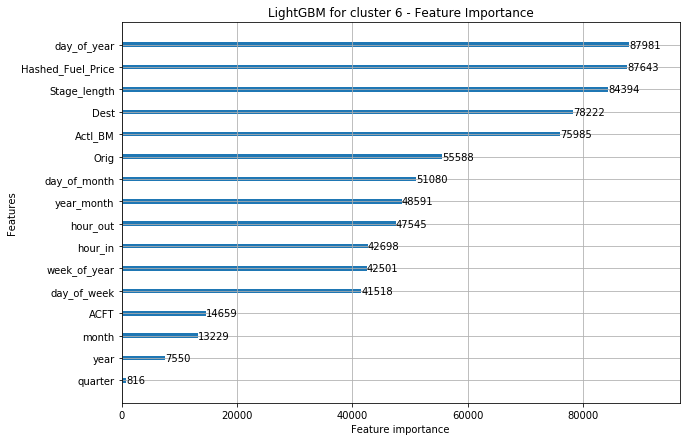

In [43]:
fig, ax = plt.subplots(figsize=(10, 7))
lgb.plot_importance(lgb_clf, max_num_features=30, ax=ax)
plt.title("LightGBM for cluster 6 - Feature Importance")

### Final plotting

In [78]:
gb_new.to_csv("GBM Output_clust0.csv")
gb_new1.to_csv("GBM Output_clust1.csv")
gb_new2.to_csv("GBM Output_clust2.csv")
#gb_new3 = pd.read_csv("GBM Output_clust3.csv")
gb_new4.to_csv("GBM Output_clust4.csv")
#gb_new5.to_csv("GBM Output_clust5.csv")
gb_new6.to_csv("GBM Output_clust6.csv")

In [53]:
#Final accuracy plot - export dataframe to plot in Tableau too
accuracies = []

accuracies.append(gb_new['percent_off'].mean()*100)
accuracies.append(gb_new1['percent_off'].mean()*100)
accuracies.append(gb_new2['percent_off'].mean()*100)
#accuracies.append(gb_new3['percent_off'].mean()*100)
accuracies.append(gb_new4['percent_off'].mean()*100)
accuracies.append(gb_new5['percent_off'].mean()*100)
accuracies.append(gb_new6['percent_off'].mean()*100)

In [54]:
accuracies

[1.5870814003860565,
 0.7334556770744338,
 0.24756908512306408,
 0.7659271529348594,
 8.502602594162715,
 0.4403008959299569]

In [73]:
acc = {'Cluster': [0,1,2,4,5,6], 'Accuracy': accuracies}

In [74]:
Acc_df = DataFrame(acc).set_index('Cluster')

In [75]:
Acc_df

,Accuracy
Cluster,
0,1.587081
1,0.733456
2,0.247569
4,0.765927
5,8.502603
6,0.440301


In [77]:
Acc_df.to_csv("Accuracies.csv")

Text(0.5, 1.0, 'Percentage off from original based on 7 clusters')

<Figure size 1080x360 with 0 Axes>

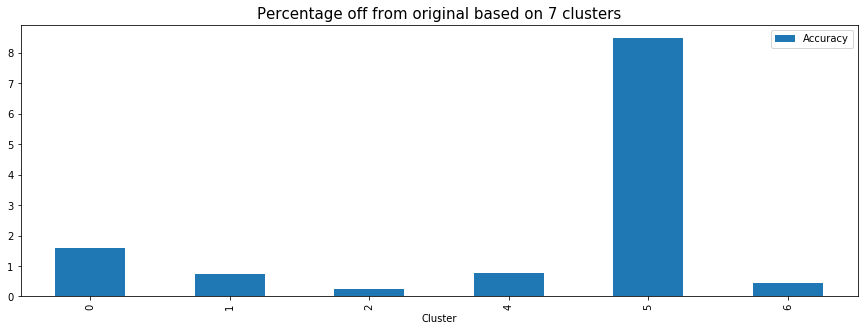

In [76]:
plt.figure(figsize=(15, 5))
acc_percent_by_decile = Acc_df.plot(kind='bar', figsize = (15,5))
plt.title('Percentage off from original based on 7 clusters', size=15)
#plt.savefig('/Users/Aifaz/Desktop/acc.png')